In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
from scipy.io import loadmat
import scipy.linalg as linalg
import numpy as np
from scipy.stats import norm


Let's load the data

In [2]:
df = pd.read_csv('OurDatabase.csv')


Let's see column names

In [3]:
df.columns

Index(['Unnamed: 0', 'Time', 'Time Code', 'Country Name', 'Country Code',
       'Fertility rate', 'Life expectancy', 'Unemployment', 'GDP per capita',
       'Population growth', 'Alcohol per capita', 'Suicide mortality rate',
       'PM2.5 air pollution', 'Population density', 'Military expenditure',
       'Terrorism Index', 'Happiness Score', 'isDevelopedEconomy',
       'Continent'],
      dtype='object')

Let's actually see the data 

In [4]:
df

,Unnamed: 0,Time,Time Code,Country Name,Country Code,Fertility rate,Life expectancy,Unemployment,GDP per capita,Population growth,Alcohol per capita,Suicide mortality rate,PM2.5 air pollution,Population density,Military expenditure,Terrorism Index,Happiness Score,isDevelopedEconomy,Continent
0,0,2015,YR2015,Afghanistan,AFG,4.802,63.298195,8.600000,599.135196,2.943234,1.0,5.5,48.016765,51.674929,0.993454,9.233,3.575,n,Asia
1,1,2015,YR2015,Albania,ALB,1.714,78.203146,17.100000,4524.990993,-0.291206,6.6,4.3,17.936625,105.135146,1.167601,2.116,4.959,n,Europe
2,2,2015,YR2015,Algeria,DZA,2.839,75.855293,11.200000,4759.595242,1.919959,0.6,3.1,35.564533,16.740504,6.274210,4.750,5.605,n,Africa
3,3,2015,YR2015,Angola,AGO,5.766,61.189341,6.200000,3730.169063,3.428021,7.6,20.5,36.395428,22.346439,3.515939,0.243,4.033,n,Africa
4,4,2015,YR2015,Argentina,ARG,2.308,76.293024,7.200000,10490.019568,1.009855,7.6,14.2,13.443965,15.865065,0.864723,1.674,6.574,n,South America
5,5,2015,YR2015,Armenia,ARM,1.622,74.206195,18.299999,3935.288772,0.368528,5.5,5.4,25.507685,102.456972,4.239226,0.115,4.350,n,Europe
6,6,2015,YR2015,Australia,AUS,1.833,82.451220,6.100000,54941.911458,1.391107,12.6,11.8,5.897735,3.096643,1.978861,3.114,7.284,d,Oceania
7,7,2015,YR2015,Austria,AUT,1.470,81.843902,5.700000,47834.787303,1.066623,8.5,16.4,17.012994,104.615307,0.664019,2.088,7.200,d,Europe
8,8,2015,YR2015,Azerbaijan,AZE,1.970,71.845195,5.000000,6117.030862,1.191210,2.1,3.3,30.354013,116.731077,5.608680,1.381,5.212,n,Europe
9,9,2015,YR2015,Bahrain,BHR,2.056,76.865195,1.100000,22436.207532,2.618665,2.4,6.5,55.454352,1779.319066,4.592714,4.871,5.960,n,Asia


Let's get some statistics on the data 

Standard Deviation 

In [5]:
df.std()

Unnamed: 0                   37.383151
Time                          0.000000
Fertility rate                1.343394
Life expectancy               8.197955
Unemployment                  5.872638
GDP per capita            20136.053789
Population growth             1.240800
Alcohol per capita            4.252901
Suicide mortality rate        6.665153
PM2.5 air pollution          19.428142
Population density          715.539449
Military expenditure          1.932532
Terrorism Index               2.522498
Happiness Score               1.143807
dtype: float64

Mean

In [6]:
df.mean()

Unnamed: 0                   64.000000
Time                       2015.000000
Fertility rate                2.676845
Life expectancy              72.228903
Unemployment                  8.309302
GDP per capita            14712.339269
Population growth             1.399971
Alcohol per capita            6.756589
Suicide mortality rate       10.694574
PM2.5 air pollution          28.985288
Population density          212.794763
Military expenditure          2.025379
Terrorism Index               2.654636
Happiness Score               5.384101
dtype: float64

Let's get the maximums and minimums with the respective countries

In [7]:
l = list(df.columns)
attributesToShow = l[5:-2]
maxAtt = df[attributesToShow].max() 
maxLoc = df.iloc[df[attributesToShow].idxmax()]['Country Name']
minAtt = df[attributesToShow].min() 
minLoc = df.iloc[df[attributesToShow].idxmin()]['Country Name']
maxLoc.index = maxAtt.index
minLoc.index = minAtt.index
maxAtt = pd.concat([maxAtt,maxLoc], axis = 1)
minAtt = pd.concat([minAtt,minLoc], axis = 1)

Maximums

In [8]:
maxAtt

,0,Country Name
Fertility rate,6.145000,Mali
Life expectancy,83.843659,Japan
Unemployment,26.799999,Lesotho
GDP per capita,107648.608008,Luxembourg
Population growth,5.856170,Oman
Alcohol per capita,17.400000,Moldova
Suicide mortality rate,35.300000,Sri Lanka
PM2.5 air pollution,106.161737,Saudi Arabia
Population density,7806.772920,Singapore
Military expenditure,14.384188,Oman


Mins

In [9]:
minAtt

,0,Country Name
Fertility rate,1.230000,Portugal
Life expectancy,51.412854,Sierra Leone
Unemployment,0.100000,Cambodia
GDP per capita,226.528058,Burundi
Population growth,-0.940754,Lithuania
Alcohol per capita,0.100000,Kuwait
Suicide mortality rate,1.400000,Jamaica
PM2.5 air pollution,5.546611,New Zealand
Population density,1.916165,Mongolia
Military expenditure,0.180169,Mauritius


Range

In [10]:
maxAtt[0]-minAtt[0]

Fertility rate                 4.915000
Life expectancy               32.430805
Unemployment                  26.699999
GDP per capita            107422.079950
Population growth              6.796924
Alcohol per capita            17.300000
Suicide mortality rate        33.900000
PM2.5 air pollution          100.615126
Population density          7804.856755
Military expenditure          14.204019
Terrorism Index               10.000000
Happiness Score                4.748000
Name: 0, dtype: float64

In [11]:
df.median()

Unnamed: 0                  64.000000
Time                      2015.000000
Fertility rate               2.101000
Life expectancy             74.353171
Unemployment                 6.400000
GDP per capita            5733.921447
Population growth            1.203520
Alcohol per capita           6.800000
Suicide mortality rate       9.300000
PM2.5 air pollution         22.869524
Population density          82.995852
Military expenditure         1.503921
Terrorism Index              2.125000
Happiness Score              5.194000
dtype: float64

Let's get some box plots

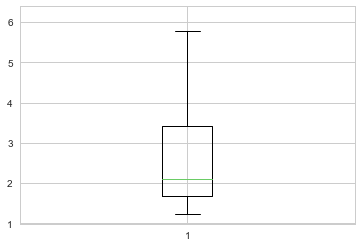

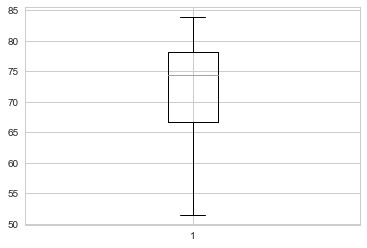

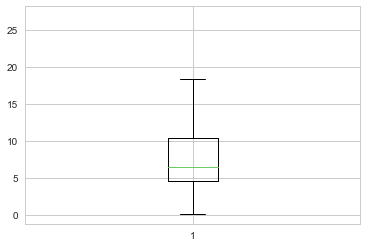

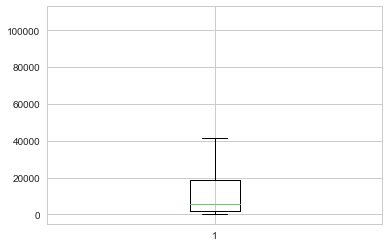

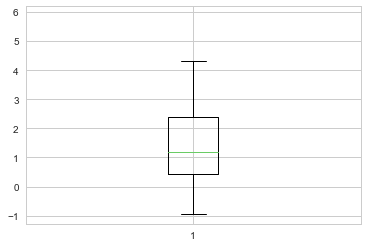

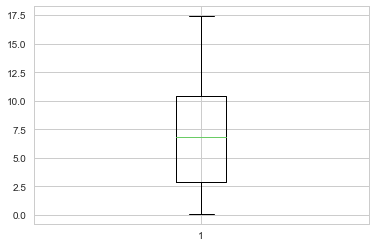

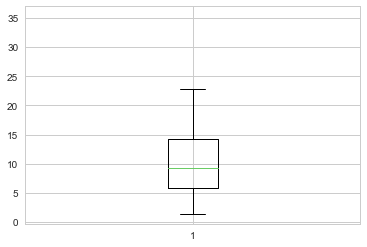

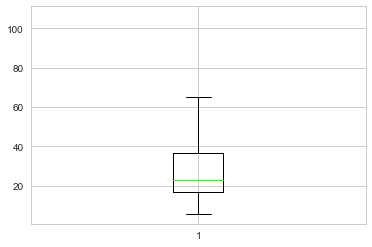

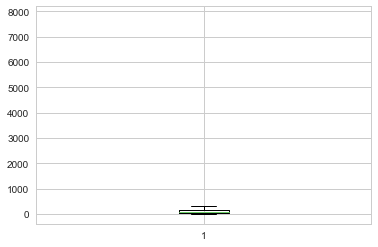

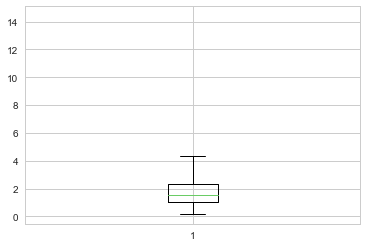

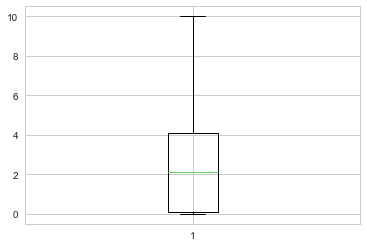

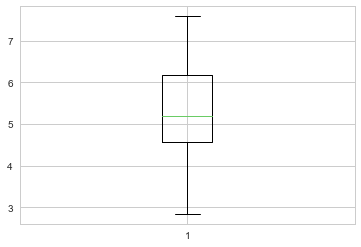

In [12]:
for i in attributesToShow:
    plt.figure()
    plt.boxplot(df[i])


Let's get the histograms

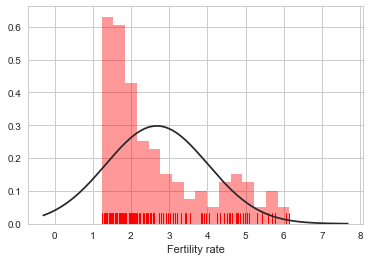

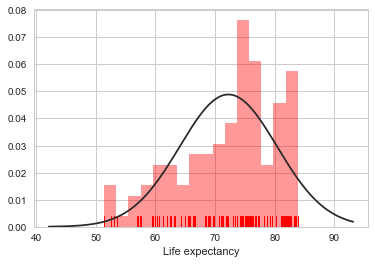

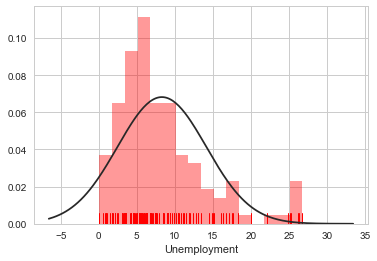

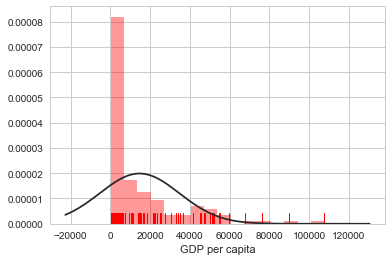

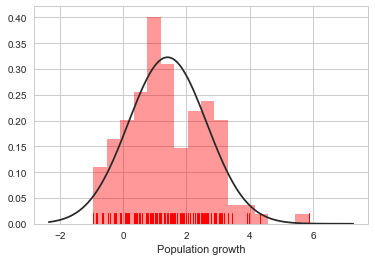

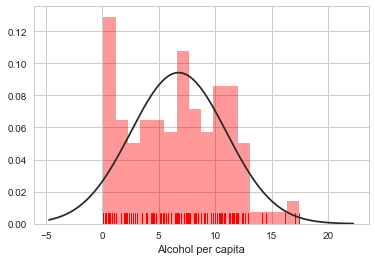

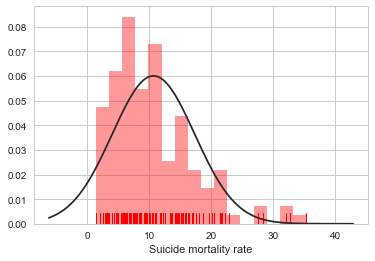

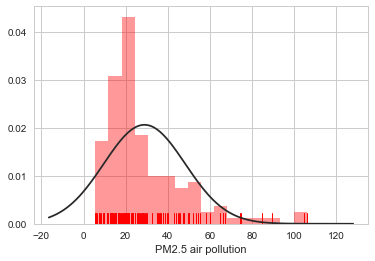

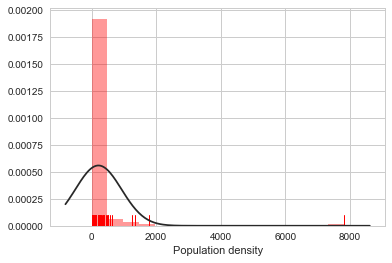

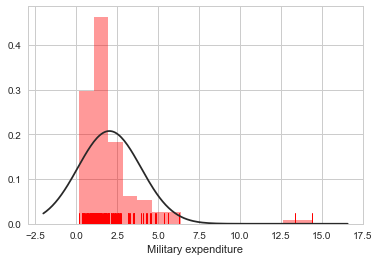

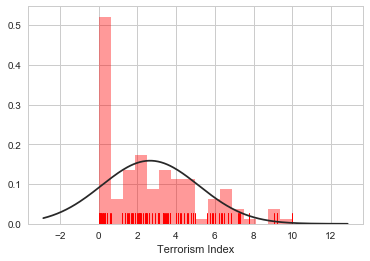

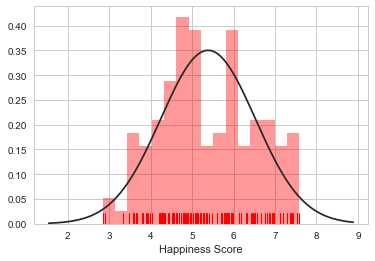

In [13]:
for i in range(0, len(attributesToShow)):
    plt.figure()
    sns.distplot(df[attributesToShow[i]],kde=False, rug=True, fit=norm, bins =16, color = 'r')

Let's get the correlation matrix

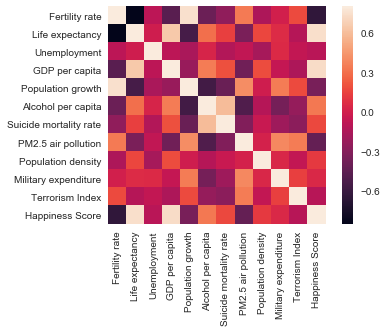

In [14]:
corrmat = df[attributesToShow].corr()
sns.heatmap(corrmat, vmax=.8, square=True)


Let's get a pairplot showing each scatter plot

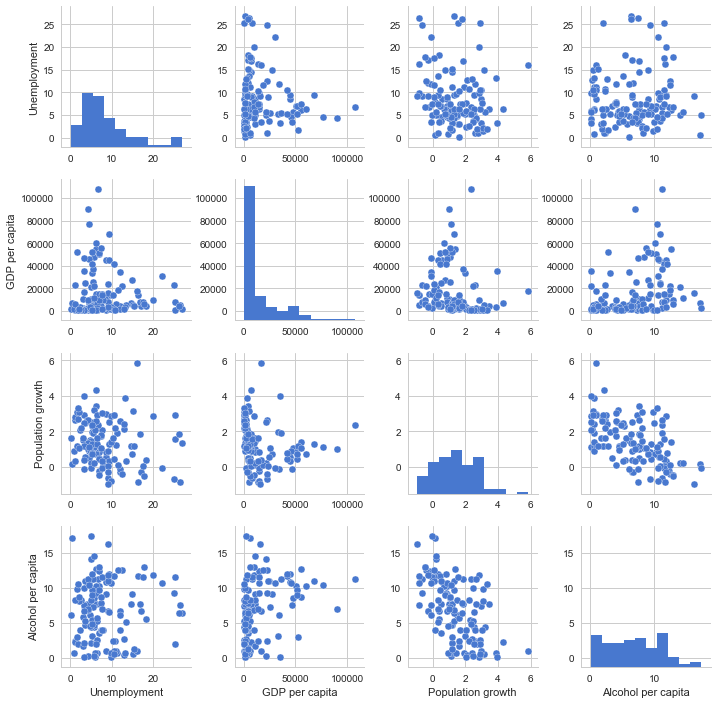

In [15]:
sns.pairplot(df[['Unemployment', 'GDP per capita',
       'Population growth', 'Alcohol per capita']]);

Let's get some world maps

In [16]:
data = dict(type = 'choropleth', 
           locations = df['Country Name'],
           locationmode = 'country names',
           z = df['Terrorism Index'], 
           text = df['Country Name'],
           colorbar = {'title':'Terrorism'},
           colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(0, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ))
layout = dict(title = 'Terrorism Index', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [17]:
data = dict(type = 'choropleth', 
           locations = df['Country Name'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country Name'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [18]:
data = dict(type = 'choropleth', 
           locations = df['Country Name'],
           locationmode = 'country names',
           z = df['PM2.5 air pollution'], 
           text = df['Country Name'],
           colorbar = {'title':'Air Pollution'},
           colorscale = 'Earth',
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ))
layout = dict(title = 'Air Pollution (PM2.5)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# PCA

Let's get the X matrix and show shapes

In [19]:
X = df.as_matrix(columns = attributesToShow)
N = len(df)
X.shape

(129, 12)

Let's standirdize our X matrix

In [20]:
stdVector = np.array(df[attributesToShow].std())
stdVector = np.expand_dims(stdVector,axis = 0)
X = X / stdVector
Xc = X - np.ones((N,1))*X.mean(0)

Singular value decomposition

In [21]:
# PCA by computing SVD of Y
U,S,V = linalg.svd(Xc,full_matrices=False)
#U = mat(U)
V = V.T

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Project data onto principal component space
Z = Xc @ V

Variance explained by PCs

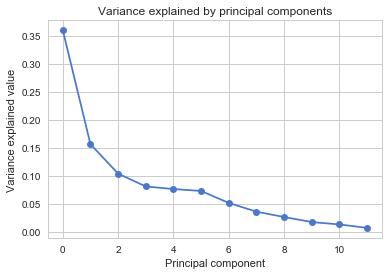

In [22]:
# Plot variance explained
plt.figure()
plt.plot(rho,'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained value');

Cumulative variance explained

Text(0,0.5,'Variance explained value')

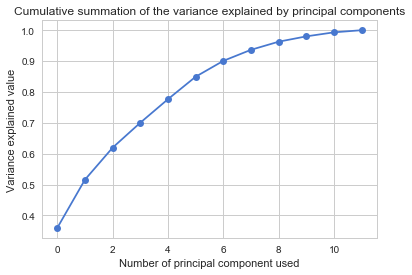

In [23]:
cumSum = np.cumsum(rho)

# Plot variance explained
plt.figure()
plt.plot(cumSum,'o-')
plt.title('Cumulative summation of the variance explained by principal components')
plt.xlabel('Number of principal component used')
plt.ylabel('Variance explained value')


Reflection on pc1 when we sort the instances, also when we get the max 5

113    Switzerland
69      Luxembourg
38         Finland
68       Lithuania
32         Denmark
Name: Country Name, dtype: object


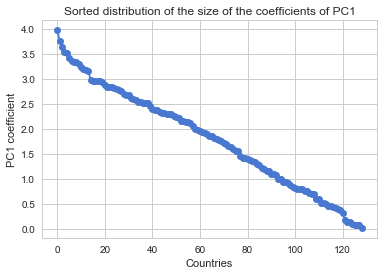

In [24]:
ZZ = Xc @ V[:,0]
indexes = ZZ.argsort()[-5:][::-1]

print(df.iloc[indexes]['Country Name'])
Z1 = sorted(list(abs(ZZ)), reverse = True)
# Plot variance explained
plt.figure()
plt.plot(Z1,'o-')
plt.title('Sorted distribution of the size of the coefficients of PC1');
plt.xlabel('Countries');
plt.ylabel('PC1 coefficient');

Reflection on pc2 when we sort the instances, also when we get the max 5

68        Lithuania
103    Sierra Leone
28      Ivory Coast
79         Mongolia
78          Moldova
Name: Country Name, dtype: object


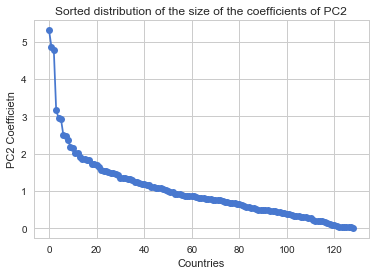

In [25]:
ZZ = Xc @ V[:,1]
indexes = ZZ.argsort()[-5:][::-1]

print(df.iloc[indexes]['Country Name'])
Z1 = sorted(list(abs(ZZ)), reverse = True)
# Plot variance explained
plt.figure()
plt.plot(Z1,'o-')
plt.title('Sorted distribution of the size of the coefficients of PC2');
plt.xlabel('Countries');
plt.ylabel('PC2 Coefficietn');

Let's plot a scatter plot with pc1 and pc2

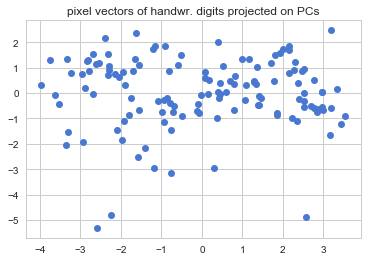

In [26]:
# Plot PCA of the data
plt.figure()
plt.title('pixel vectors of handwr. digits projected on PCs')
plt.plot(Z[:,0], Z[:,1], 'o')

Let's get a y vector showing if a country is developed or not 

In [27]:
y = df['isDevelopedEconomy'].as_matrix()
myClasses = ['d', 'n']

Let's code colors on scatter plots as whether the economy is developed or not 

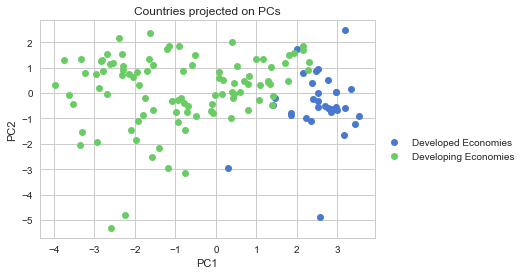

In [28]:
# Plot PCA of the data
plt.figure()
plt.title('Countries projected on PCs')
for c in myClasses:
    # select indices belonging to class c:
    class_mask = (y == c)
    plt.plot(Z[class_mask,0], Z[class_mask,1], 'o')

plt.legend(['Developed Economies','Developing Economies'], bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1');
plt.ylabel('PC2');

Let's do the same for continents

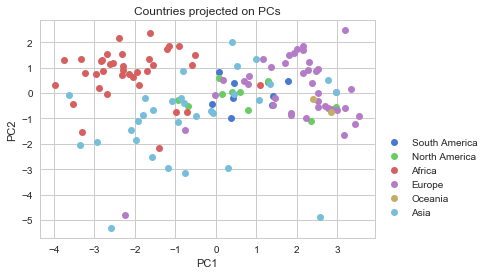

In [29]:
continentsOfInstances= df['Continent'].as_matrix()

continents = set(df['Continent'])

# Plot PCA of the data
plt.figure()
plt.title('Countries projected on PCs')
for c in continents:
    # select indices belonging to class c:
    class_mask = (continentsOfInstances == c)
    plt.plot(Z[class_mask,0], Z[class_mask,1], 'o')
plt.legend(continents,  bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1');
plt.ylabel('PC2');
